
# Project: Investigate a Dataset - Analyze TMDb Movie Data¶



## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Overview
To complete my Data Analysis project I will be using the TMDb movie dataset.

This dataset contains information about 10 thousand movies including user ratings and revenue, this dataset collected from The Movie Database (TMDb). It consist of 21 columns such as imdb_id, revenue, budget, vote_count etc.

### Questions:
1-Is there a relationship between higher budgeted movies and more revenue?               
2-Average runtime of the movies?                                    
3-Are movie releses with time incresing?                                          
4-When was the top 15 highest revenue movie produce?                     



In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [15]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [17]:
df.shape

(10866, 21)

In [18]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09





### Data Cleaning (Removing the unused information from the dataset)

1-Removing the duplicated values                                     
2-Keep columns that are necessary for the analysis and remove the others           

In [19]:
df.duplicated().sum()

1

I found one duplicate row, Now I will to be removed from dataframe

In [22]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [23]:
columns = ['budget','revenue','genres', 'original_title','runtime', 'release_year', 'budget_adj', 'revenue_adj']
df_new = df[columns]

In [24]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   budget          10865 non-null  int64  
 1   revenue         10865 non-null  int64  
 2   genres          10842 non-null  object 
 3   original_title  10865 non-null  object 
 4   runtime         10865 non-null  int64  
 5   release_year    10865 non-null  int64  
 6   budget_adj      10865 non-null  float64
 7   revenue_adj     10865 non-null  float64
dtypes: float64(2), int64(4), object(2)
memory usage: 763.9+ KB


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### 1- Is there a relationship between higher budgeted movies and more revenue?

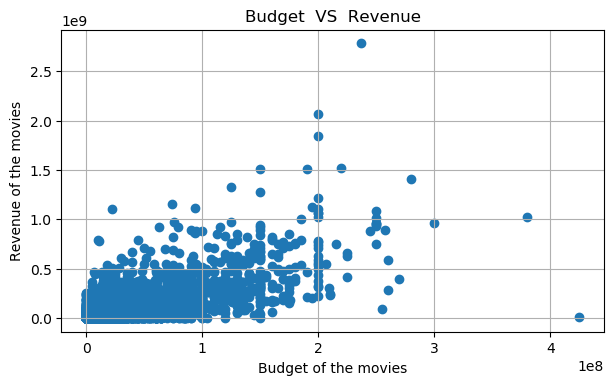

In [25]:
plt.figure(figsize=(7,4), dpi = 100)
plt.scatter(df_new['budget'], df_new['revenue'])
plt.xlabel('Budget of the movies')
plt.ylabel('Revenue of the movies')
plt.title('Budget  VS  Revenue')

plt.grid()
plt.show()

By the graph, We can see that there is a relationship, Acceptable yet not significantly strong. 

### 2- Average runtime of the movies

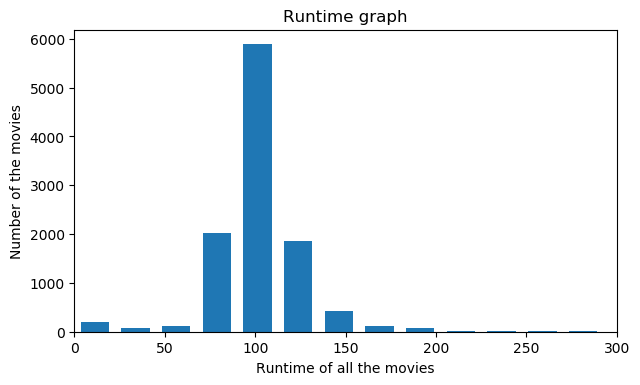

In [26]:
plt.figure(figsize=(7,4), dpi = 100)
plt.hist(df_new['runtime'],bins =40,rwidth=0.7)
plt.xlabel('Runtime of all the movies')
plt.ylabel('Number of the movies')
plt.title('Runtime graph')
plt.xlim([0, 300])

plt.show()

By the graph, Most of the movies are timed around 100 minutes. Almost 10,000 and more number of movies fall in this criteria.

### 3- Are movie releses with time incresing?

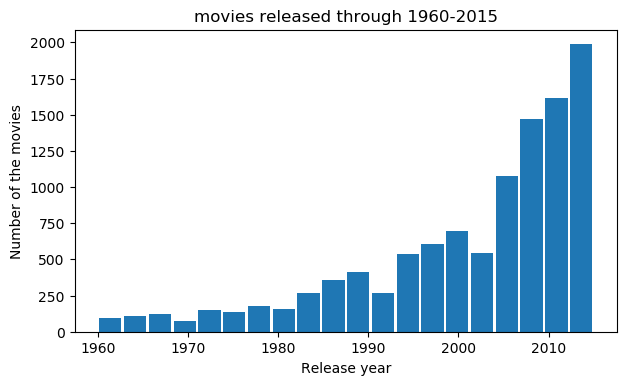

In [27]:
plt.figure(figsize=(7,4), dpi = 100)
plt.hist(df_new['release_year'],bins =20,rwidth=0.9)
plt.xlabel('Release year')
plt.ylabel('Number of the movies')
plt.title('movies released through 1960-2015')

plt.show()

By the graph, it is clear that there is been a tremendous rise in movie releases over the years, it is a positive relationship with the progress of the years, the movies releases increase.

### 4-When was the top 15 highest revenue movie produce?

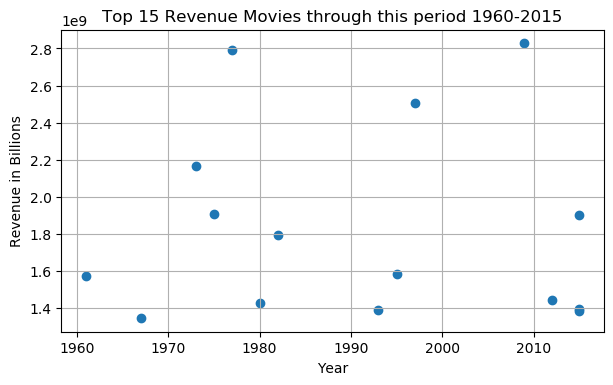

In [28]:
top15 = df_new.nlargest(15, 'revenue_adj').sort_values('release_year')
plt.figure(figsize=(7,4), dpi = 100)
plt.scatter(top15['release_year'], top15['revenue_adj']);
plt.grid();
plt.ylabel('Revenue in Billions');
plt.xlabel ('Year');
plt.title('Top 15 Revenue Movies through this period 1960-2015');

The top 15 revenues movies is distributed from 1960 to 2015. The top 3 revenues movie produce signficantly higher revenue than the others and were released in the late 2000s (Avatar), late 1970s (Star Wars) and late 1990s (Titanic).  By the graph, it is clear to us that during the last century, revenues were higher than the current century, especially in the period 1970-1982.

In [30]:
top15.sort_values('revenue_adj', ascending = False).head(3)

,budget,revenue,genres,original_title,runtime,release_year,budget_adj,revenue_adj
1386,237000000,2781505847,Action|Adventure|Fantasy|Science Fiction,Avatar,162,2009,2.408869e+08,2.827124e+09
1329,11000000,775398007,Adventure|Action|Science Fiction,Star Wars,121,1977,3.957559e+07,2.789712e+09
5231,200000000,1845034188,Drama|Romance|Thriller,Titanic,194,1997,2.716921e+08,2.506406e+09


<a id='conclusions'></a>
## Conclusions
The intent of this exploratory data analysis has helped answer the research questions: Is there a relationship between higher budgeted movies and more revenue? Average runtime of the movies? Are movie releses with time incresing? When was the top 15 highest revenue movie produce?

On the first question, it is clear from the graph that there is no strong relationship in the sense that some movies have more revenues than their budget and this is a successful movie, and vice versa. As for the runtime of the movies, it is usually between 90 to 120 minutes, if it is less than that in my opinion, it will turn into an episode of the series, and if it is more than that the watcher will feel bored. By the third graph, we can see the Incrementally growth of the movie industry over the years, and this shows us that there is a demand of people for movies and their love for it is also, so we see large and successful companies such as Universal Pictures and Columbia Pictures. By the fourth graph, it is clear to us that during the last century, revenues were higher than in the current century. In my opinion, the rise in revenues over the last century was because the things were for fun be little including movies, also movies were only shown in the cinema or through tapes. Also Now in some countries, there is piracy of movies, and this reduces movie revenues